# Assignment on Clustering 

#### Importing and understanding the data

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing  required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# reading the data 
country = pd.read_csv(r'C:\Users\ARUN\Downloads\clustering+Assignment\Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Performing EDA on given data

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# missing values
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
country.shape

(167, 10)

In [7]:
# converting columns (i.e'exports' ,'health', 'imports') which are in percentage of GDP per capita into actual values
country['exports'] =((country['exports']/100)*country['gdpp'])
country['health'] =((country['health']/100)*country['gdpp'])
country['imports'] =((country['imports']/100)*country['gdpp'])
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Bivariate analysis

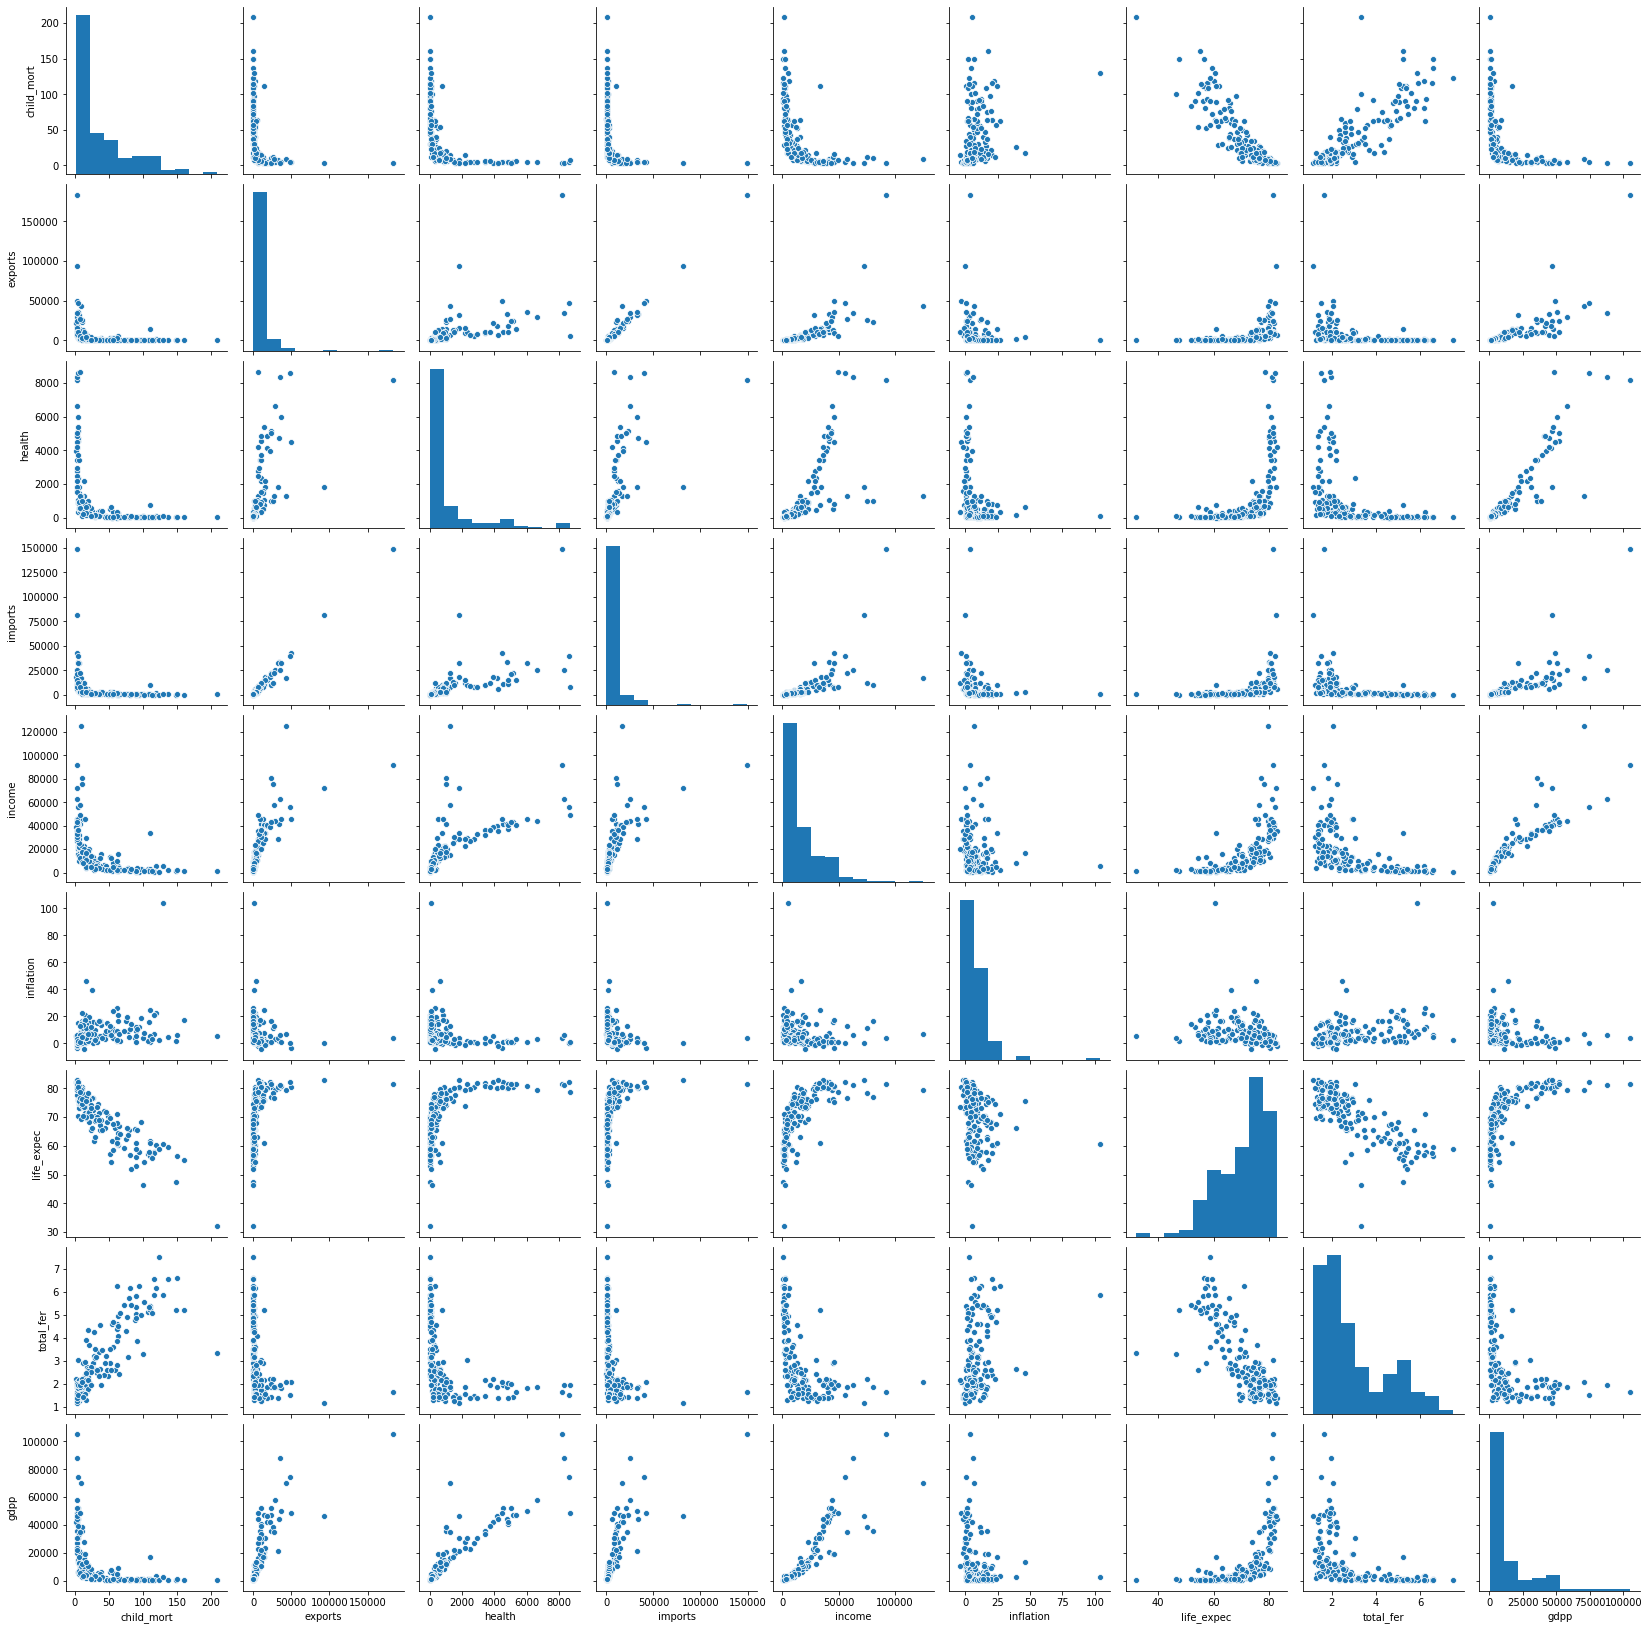

In [8]:
#plotting a pairtplot to see the relationship between the variables 
sns.pairplot(country)
plt.show()

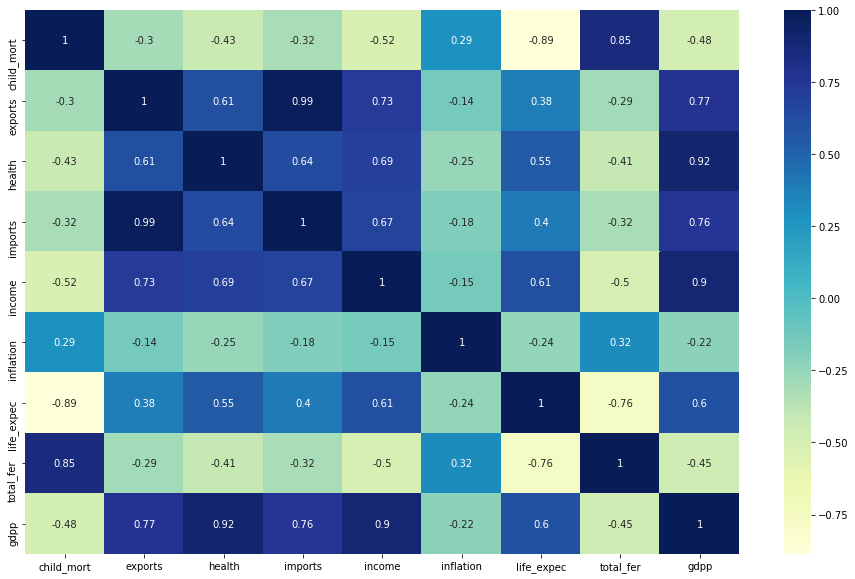

In [9]:
# Let's check the correlation between the variables

plt.figure(figsize = (16, 10))
sns.heatmap(country.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Univariate analysis

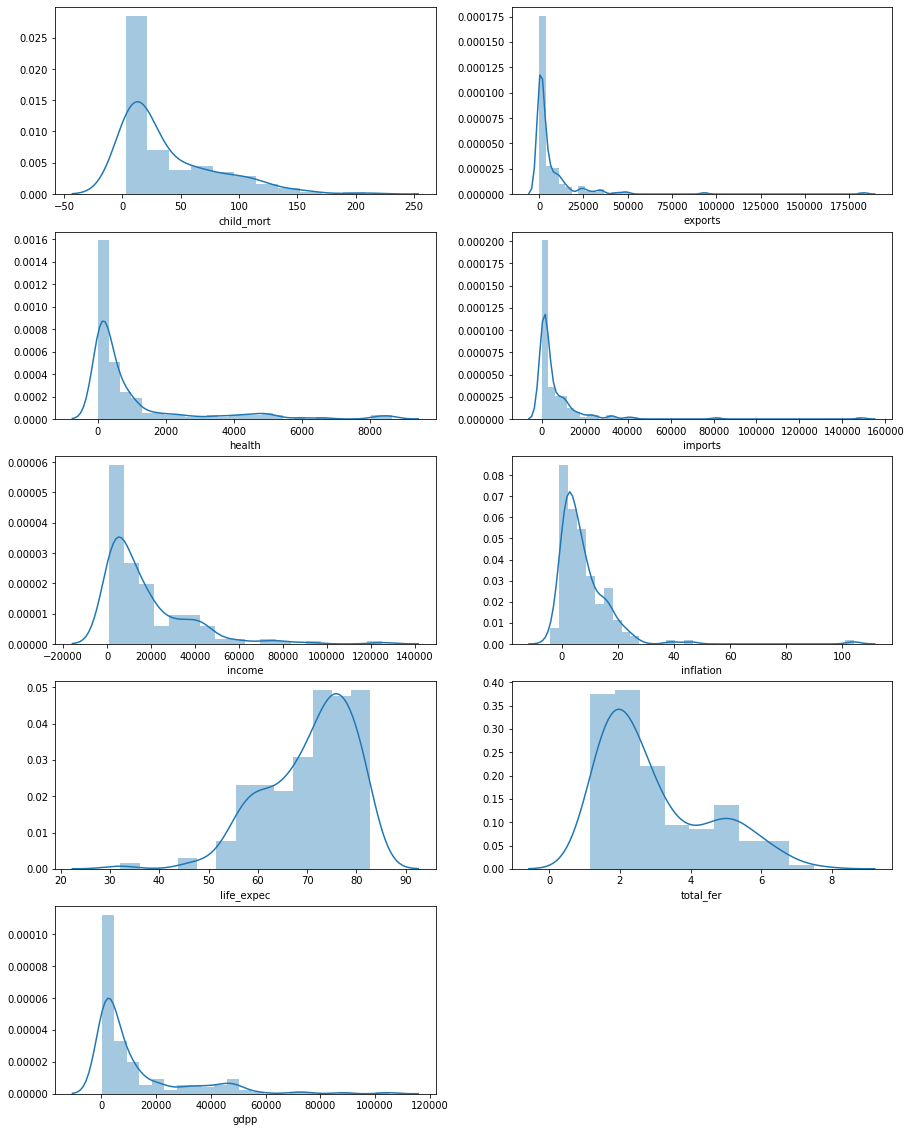

In [10]:
# plotting a disk plot to look for distribution of data.
plt.figure(figsize = (15,20))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(country[i[1]])

## Outlier treatment

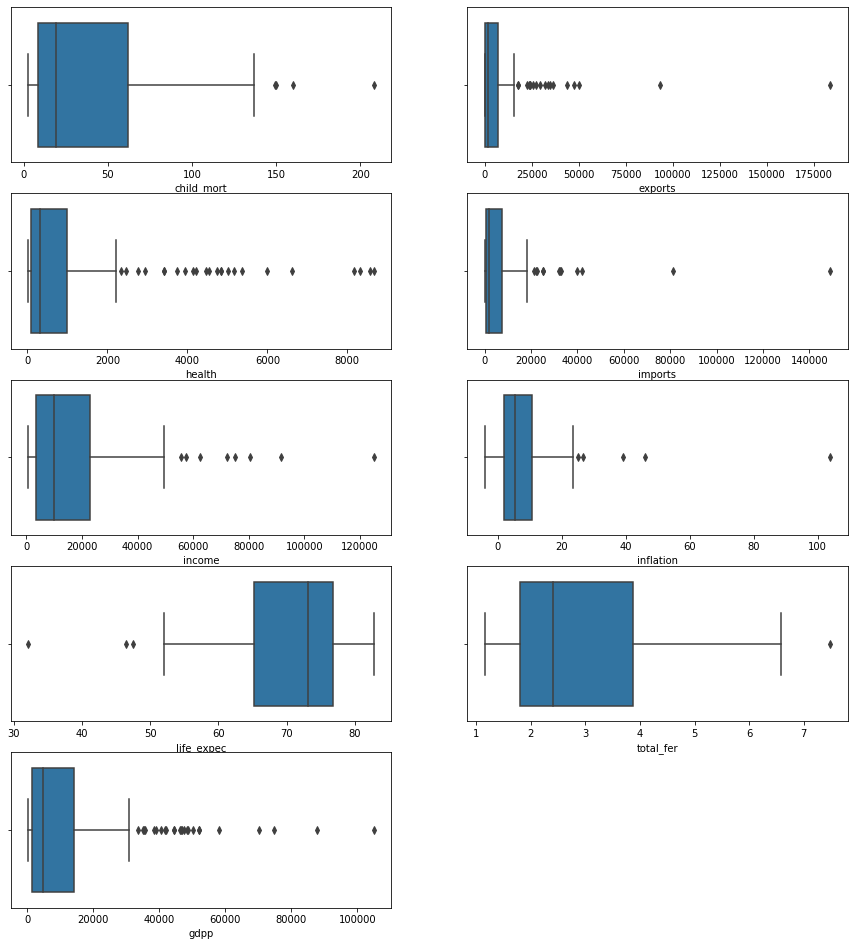

In [11]:
# plotting boxplot graph to find outliers 
plt.figure(figsize = (15,20))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(country[i[1]])

In [12]:
country.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
#seeing all the quartile value to cap the outliers.
print(country.exports.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.health.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.imports.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.income.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.inflation.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.life_expec.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.total_fer.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))
print(country.gdpp.quantile([0.01,0.25, 0.5,0.75,0.90,0.95, 1.  ]))

0.01        22.243716
0.25       447.140000
0.50      1777.440000
0.75      7278.000000
0.90     17760.600000
0.95     31385.100000
1.00    183750.000000
Name: exports, dtype: float64
0.01      17.009362
0.25      78.535500
0.50     321.886000
0.75     976.940000
0.90    3825.416000
0.95    4966.701000
1.00    8663.600000
Name: health, dtype: float64
0.01       104.90964
0.25       640.21500
0.50      2045.58000
0.75      7719.60000
0.90     15034.28000
0.95     24241.56000
1.00    149100.00000
Name: imports, dtype: float64
0.01       742.24
0.25      3355.00
0.50      9960.00
0.75     22800.00
0.90     41220.00
0.95     48290.00
1.00    125000.00
Name: income, dtype: float64
0.01     -2.3488
0.25      1.8100
0.50      5.3900
0.75     10.7500
0.90     16.6400
0.95     20.8700
1.00    104.0000
Name: inflation, dtype: float64
0.01    47.16
0.25    65.30
0.50    73.10
0.75    76.80
0.90    80.40
0.95    81.40
1.00    82.80
Name: life_expec, dtype: float64
0.01    1.2432
0.25    1.7950
0.5

In [14]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
# capping the outliers in the according to our required 
q3e = country['exports'].quantile(0.75)
q3h = country['health'].quantile(0.75)
q3i = country['imports'].quantile(0.75)
q4in = country['income'].quantile(0.95)
q4if = country['inflation'].quantile(0.95)
q4t = country['total_fer'].quantile(0.99)
q3g = country['gdpp'].quantile(0.75)
country['exports'][country['exports']>=q3e] = q3e
country['health'][country['health']>=q3h] = q3h
country['imports'][country['imports']>=q3i] = q3i
country['income'][country['income']>=q4in] = q4in
country['inflation'][country['inflation']>=q4if] = q4if
country['total_fer'][country['total_fer']>=q4t] = q4t
country['gdpp'][country['gdpp']>=q3g] = q3g


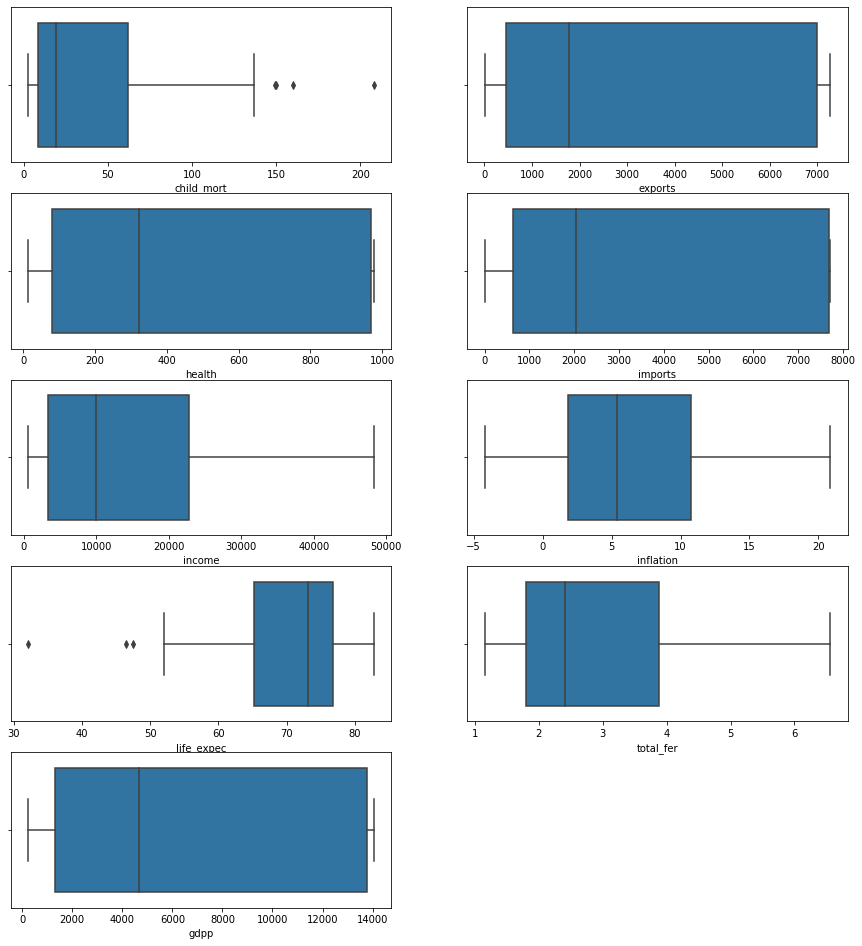

In [16]:
plt.figure(figsize = (15,20))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(country[i[1]])

In [17]:
#Calculating the Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(country.drop('country',axis = 1))

0.8568906379670562

In [19]:
data1 = country.drop ('country', axis = 1)

## Scaling the data

In [20]:
# scaling the data using standardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

In [21]:
# converting the scaled data into dataframe
data1 = pd.DataFrame(data1)
data1.columns = country.columns[1:]
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.038641,-1.048756,-1.021021,-0.958349,0.394438,-1.619092,1.926396,-1.136374
1,-0.538949,-0.660779,-0.452890,-0.437634,-0.394006,-0.383226,0.647866,-0.865054,-0.477439
2,-0.272833,-0.464051,-0.668881,-0.634607,-0.192552,1.440750,0.670423,-0.034983,-0.408509
3,2.007808,-0.295366,-0.894006,-0.596396,-0.667360,2.190136,-1.179234,2.153997,-0.581766
4,-0.695634,0.866688,0.780528,1.305729,0.227992,-0.862393,0.704258,-0.543736,1.033434


### Finding the value of K

For n_clusters=2, the silhouette score is 0.4816682906760779
For n_clusters=3, the silhouette score is 0.43551949706401694
For n_clusters=4, the silhouette score is 0.3655245133176908
For n_clusters=5, the silhouette score is 0.35517294187451803
For n_clusters=6, the silhouette score is 0.3459915365082535
For n_clusters=7, the silhouette score is 0.33451653065282216
For n_clusters=8, the silhouette score is 0.29873064457253173
For n_clusters=9, the silhouette score is 0.2744964027742744
For n_clusters=10, the silhouette score is 0.30209366068566035


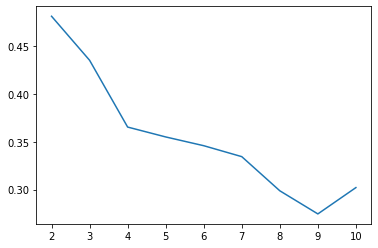

In [22]:
# Silhouette Score
ss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(data1)
    ss.append([k, silhouette_score(data1, kmeans.labels_)])
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
# plotting the scores graph 
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

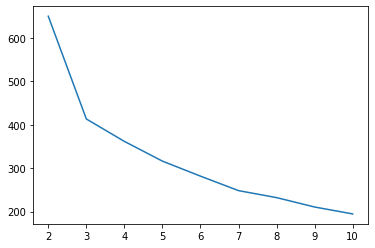

In [23]:
# elbow-curve/SSD
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(data1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

### As we see in elbow curve after 3 there is no significant drop and when we saw percentage of scores in Silhouette Score method it suggested us to take 2 but it not recommanded in industries  to take 2 clusters as it only divide in to part of data . so we are taking 3 clusters as the Silhouette Score is near to 2 clusters .By comparing both elbow and Silhouette Score we came to conclusion that it is suitable to take 3 cluster(K=3)

In [24]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [25]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [26]:
country.kmean = country.copy()
country.kmean = pd.concat([country.kmean, label ], axis =1)
country.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [27]:
# checking datapoints we have in each cluster
country.kmean.label.value_counts()

2    70
0    55
1    42
Name: label, dtype: int64

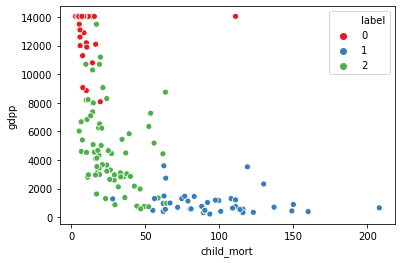

In [28]:
# Ploting  a scatter plot to  see distrinbution of culster with respect to data 
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = country.kmean, palette = 'Set1')

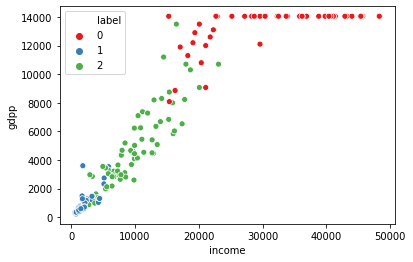

In [29]:
# Ploting  a scatter plot to  see distrinbution of culster with respect to data 
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = country.kmean, palette = 'Set1')

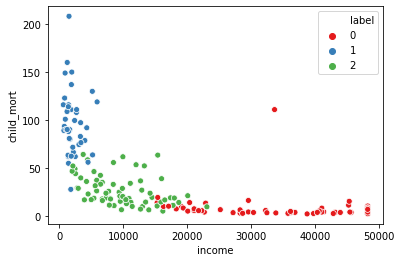

In [30]:
# Ploting  a scatter plot to  see distrinbution of culster with respect to data 
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = country.kmean, palette = 'Set1')

### Profiling the data 

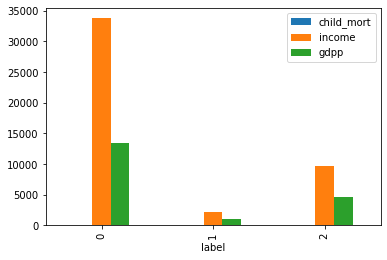

In [31]:
# plotting a bra graph to know which cluster is having countries which are in need aid 
country.kmean.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer' ],axis = 1).groupby('label').mean().plot(kind = 'bar')

<Figure size 720x2160 with 0 Axes>

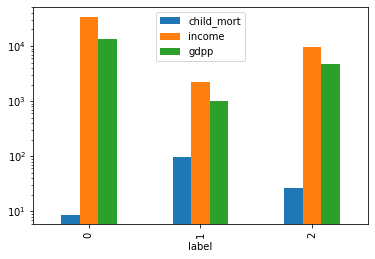

In [32]:
# plotting a bra graph to know which cluster is having countries which are in need aid (log of data)
plt.figure(figsize=(10,30))
country.kmean.drop(['country','exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

In [33]:
# countries which are in need of aid
country.kmean[country.kmean['label'] ==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113                     Nigeria
116                    Pakistan
126     

In [34]:
country.kmean[country.kmean['label'] ==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.870,60.1,6.1600,3530,1
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446,1
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334,1


### Top 5 countries which are in need of aid.

In [35]:
country.kmean[country.kmean['label'] ==1].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True,True ]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708,1


# Hierarchical Clustering

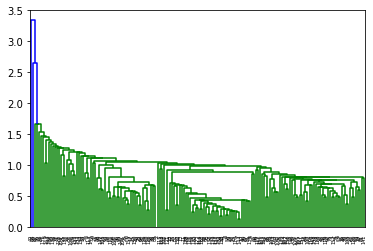

In [36]:
# single linkage
mergings = linkage(data1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

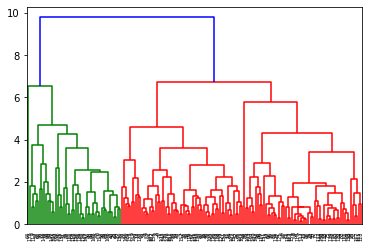

In [37]:
# complete linkage
mergings = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [38]:
# 3 clusters
hier_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
hier_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [39]:
label = pd.DataFrame(hier_labels, columns = ['label'])

In [40]:
# assign cluster labels to data
country.hier = country.copy()
country.hier = pd.concat([country.hier, label], axis =1)
country.hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


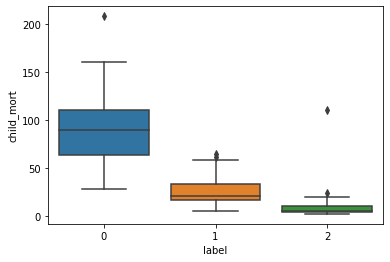

In [41]:
# ploting box plot to visulize the clusters
sns.boxplot(x='label', y='child_mort', data=country.hier)

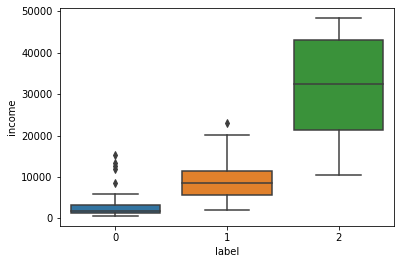

In [42]:
# ploting box plot to visulize the clusters
sns.boxplot(x='label', y='income', data=country.hier)

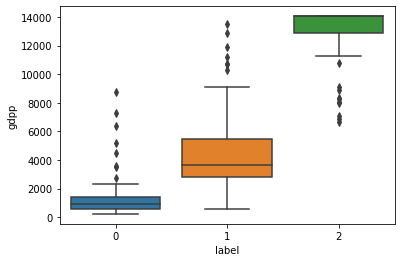

In [43]:
# ploting box plot to visulize the clusters
sns.boxplot(x='label', y='gdpp', data=country.hier)

### Profiling the data 

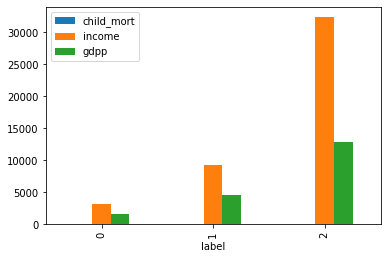

In [44]:
# plotting a bra graph to know which cluster is having countries which are in need aid 
country.hier.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer' ],axis = 1).groupby('label').mean().plot(kind = 'bar')

<Figure size 720x2160 with 0 Axes>

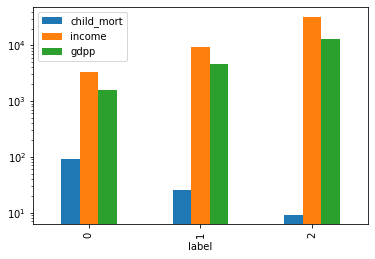

In [45]:
# plotting a bra graph to know which cluster is having countries which are in need aid (log of data)
plt.figure(figsize=(10,30))

country.hier.drop(['country','exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

In [46]:
country.hier[country.hier['label'] ==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

### Top 5 countries which are in need of aid.

In [47]:
country.hier[country.hier['label'] == 0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True,True ]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708,0


## Conclusion

### `1.`The top 5 countries according to K-mean clustering  are ‘Haiti’, ‘Sierra Leone’, ‘Chad’, ‘Central African Republic’, ‘Mali’.
### `2.`The top 5 countries according to Hierarchical clustering  are ‘Haiti’, ‘Sierra Leone’, ‘Chad’, ‘Central African Republic’, ‘Mali’.
### `3.`By looking at K-mean and Hierarchical clustering data ,we are getting same countries in both the cases ,so we recommend to the CEO that we have to focus more on these 5 countries for providing them aid. 
